In [98]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from src.retriever import get_embeddings_for_target_text, search_and_filter_similar_vectors
from src.utils import connect_and_load_milvus_collection

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from src.retriever import *

from src.ssn import ( get_similarity_fraction_at_threshold, get_similarity_fraction_at_threshold_dict_for_all_texts_and_encoder_models, 
                     get_cross_text_consistency, get_from_encoder_to_cross_text_consistency )
from src.consistency_plots import ( plot_heatmap_for_similarity_fraction, plot_heatmap_for_similarity_fraction_plotly, 
                                   plot_heatmap_for_cross_text_consistency, plot_heatmap_for_cross_text_consistency_plotly)

from tqdm import tqdm

import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exploring Cross-Text Consistency

In this section, we will explore the cross-text consistency based on the cosine similarity of vector embeddings for two embedding models. This analysis will help us understand how similar the texts are when represented in different embedding spaces.

In [89]:

texts = ["Bible_NT", "Quran", "Torah", "Gita", "Analects"]  # "Bible",
encoder_models = ["jina_clip_v1","all_MiniLM_L6_v2" ]
parameters = [0.5, 0.75]
parameter_path_dict = {"0.5" : "05_threshold" , "0.75" : "075_threshold"}
similarity_threshold = 0.75
parameter = parameter_path_dict[str(similarity_threshold)]

Get similarity fraction for all encoder models and all books in the knowledge base:

In [91]:
similarity_fraction_at_threshold_dict = get_similarity_fraction_at_threshold_dict_for_all_texts_and_encoder_models(encoder_models, similarity_threshold = 0.75, texts=["Torah", "Quran", "Bible_NT", "Gita", "Analects"])

  0%|          | 0/5 [00:00<?, ?it/s]

Torah Torah


100%|██████████| 5852/5852 [02:27<00:00, 39.75it/s]


Torah Quran


100%|██████████| 5852/5852 [02:46<00:00, 35.17it/s]


Torah Bible_NT


100%|██████████| 5852/5852 [02:22<00:00, 40.99it/s]


Torah Gita


100%|██████████| 5852/5852 [04:06<00:00, 23.79it/s]


Torah Analects


 20%|██        | 1/5 [15:06<1:00:27, 906.84s/it]

Quran Torah


100%|██████████| 6236/6236 [02:14<00:00, 46.47it/s]


Quran Quran


100%|██████████| 6236/6236 [02:10<00:00, 47.69it/s]


Quran Bible_NT


100%|██████████| 6236/6236 [01:57<00:00, 52.93it/s]


Quran Gita


100%|██████████| 6236/6236 [03:14<00:00, 32.08it/s]


Quran Analects


 40%|████      | 2/5 [27:22<40:18, 806.15s/it]  

Bible_NT Torah


100%|██████████| 7957/7957 [02:17<00:00, 58.03it/s]


Bible_NT Quran


E1022 16:47:00.207508000 11230801920 tcp_posix.cc:597]                 recvmsg encountered uncommon error: Message too long
100%|██████████| 7957/7957 [02:32<00:00, 52.34it/s]


Bible_NT Bible_NT


100%|██████████| 7957/7957 [02:36<00:00, 50.73it/s]


Bible_NT Gita


100%|██████████| 7957/7957 [04:14<00:00, 31.21it/s]


Bible_NT Analects


 60%|██████    | 3/5 [42:28<28:23, 851.94s/it]

Gita Torah


100%|██████████| 625/625 [00:10<00:00, 60.81it/s]


Gita Quran


100%|██████████| 625/625 [00:11<00:00, 52.97it/s]


Gita Bible_NT


100%|██████████| 625/625 [00:11<00:00, 55.94it/s]


Gita Gita


100%|██████████| 625/625 [00:20<00:00, 31.06it/s]


Gita Analects


 80%|████████  | 4/5 [43:40<09:03, 543.67s/it]

Analects Torah


100%|██████████| 477/477 [00:10<00:00, 44.84it/s]


Analects Quran


100%|██████████| 477/477 [00:08<00:00, 54.61it/s]


Analects Bible_NT


100%|██████████| 477/477 [00:08<00:00, 57.23it/s]


Analects Gita


100%|██████████| 477/477 [00:17<00:00, 26.72it/s]


Analects Analects


  0%|          | 0/5 [00:00<?, ?it/s]

Torah Torah


100%|██████████| 5852/5852 [01:15<00:00, 77.72it/s]


Torah Quran


100%|██████████| 5852/5852 [01:06<00:00, 88.64it/s]


Torah Bible_NT


100%|██████████| 5852/5852 [01:11<00:00, 81.60it/s]


Torah Gita


100%|██████████| 5852/5852 [01:54<00:00, 51.16it/s]


Torah Analects


 20%|██        | 1/5 [07:02<28:10, 422.71s/it]

Quran Torah


100%|██████████| 6236/6236 [01:07<00:00, 91.88it/s]


Quran Quran


100%|██████████| 6236/6236 [01:24<00:00, 73.39it/s]


Quran Bible_NT


100%|██████████| 6236/6236 [01:12<00:00, 86.24it/s]


Quran Gita


100%|██████████| 6236/6236 [02:01<00:00, 51.13it/s]


Quran Analects


 40%|████      | 2/5 [14:20<21:34, 431.64s/it]

Bible_NT Torah


100%|██████████| 7957/7957 [01:27<00:00, 91.43it/s]


Bible_NT Quran


100%|██████████| 7957/7957 [01:33<00:00, 84.75it/s]


Bible_NT Bible_NT


100%|██████████| 7957/7957 [01:36<00:00, 82.64it/s]


Bible_NT Gita


100%|██████████| 7957/7957 [02:24<00:00, 55.19it/s]


Bible_NT Analects


 60%|██████    | 3/5 [23:16<15:58, 479.09s/it]

Gita Torah


100%|██████████| 625/625 [00:06<00:00, 95.98it/s]


Gita Quran


100%|██████████| 625/625 [00:06<00:00, 94.19it/s]


Gita Bible_NT


100%|██████████| 625/625 [00:06<00:00, 89.99it/s]


Gita Gita


100%|██████████| 625/625 [00:11<00:00, 55.82it/s]


Gita Analects


 80%|████████  | 4/5 [23:57<05:06, 306.13s/it]

Analects Torah


100%|██████████| 477/477 [00:05<00:00, 89.93it/s]


Analects Quran


100%|██████████| 477/477 [00:05<00:00, 83.81it/s]


Analects Bible_NT


100%|██████████| 477/477 [00:05<00:00, 92.05it/s]


Analects Gita


100%|██████████| 477/477 [00:08<00:00, 54.28it/s]


Analects Analects


100%|██████████| 5/5 [24:29<00:00, 293.96s/it]


Plot results for similarity fraction:

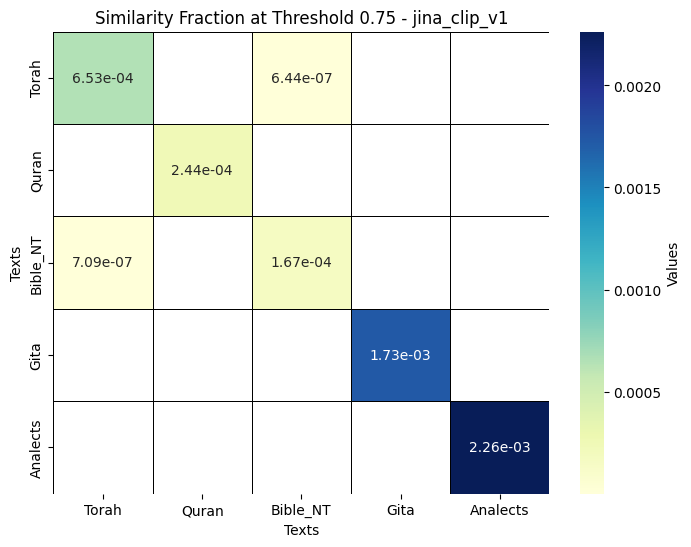

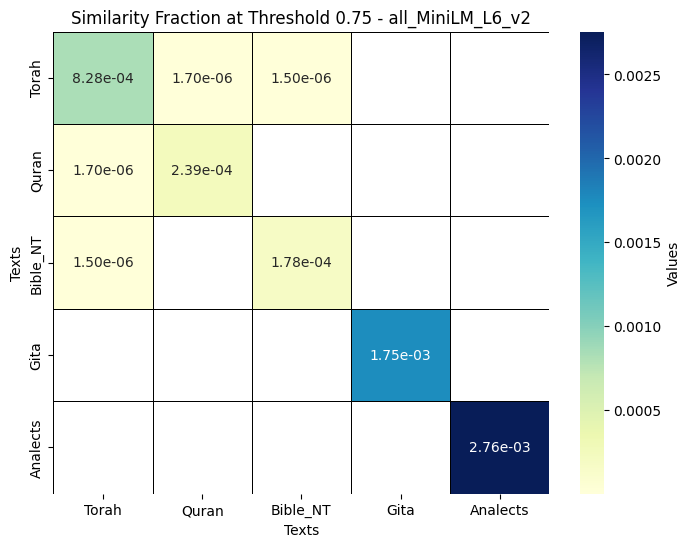

In [103]:
for encoder_model in encoder_models:

    plot_heatmap_for_similarity_fraction(similarity_fraction_at_threshold_dict[encoder_model], encoder_model)
    plot_heatmap_for_similarity_fraction_plotly(similarity_fraction_at_threshold_dict[encoder_model], encoder_model)

Get cross text semantic consistency for all encoder models and books in the knowledge base:

In [104]:
cross_text_consistency_formula_1, cross_text_consistency_formula_2 = get_from_encoder_to_cross_text_consistency(similarity_fraction_at_threshold_dict)


100%|██████████| 5/5 [00:00<00:00, 37583.37it/s]


Plot results for cross text semantic consistency:

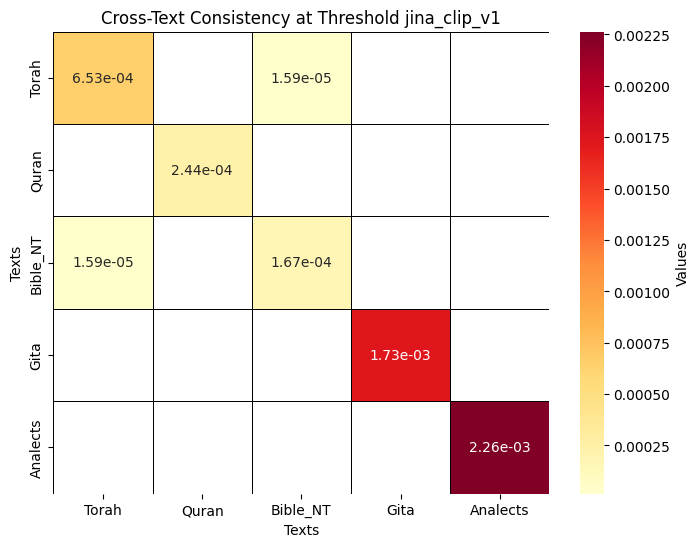

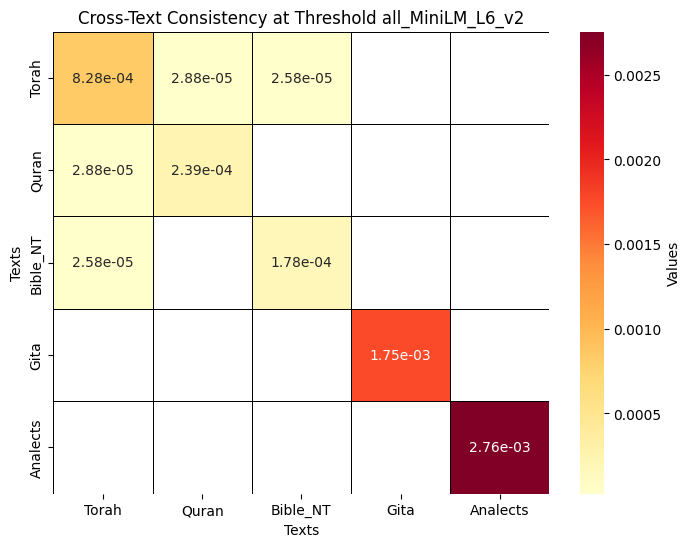

In [105]:
for encoder_model in encoder_models:

    plot_heatmap_for_cross_text_consistency(cross_text_consistency_formula_2[encoder_model], encoder_model)
    plot_heatmap_for_similarity_fraction_plotly(similarity_fraction_at_threshold_dict[encoder_model], encoder_model)